### Assignment 2 : Reinforcement Learning Programming - CSCN8020

**Khushbu Nileshkumar Lad**
<br>
(9027375)



### Assignment2_utils Functions

In [24]:
#!/usr/bin/python3
import time
import gym

#---------------------------
# Helper functions
#---------------------------

'''@brief Describes the environment actions, observation states, and reward range
'''
def describe_env(env: gym.Env):
    num_actions = env.action_space.n
    obs = env.observation_space
    num_obs = env.observation_space.n
    reward_range = env.reward_range
    action_desc = { 
        0: "Move south (down)",
        1: "Move north (up)",
        2: "Move east (right)",
        3: "Move west (left)",
        4: "Pickup passenger",
        5: "Drop off passenger"
    }
    print("Observation space: ", obs)
    print("Observation space size: ", num_obs)
    print("Reward Range: ", reward_range)
    
    print("Number of actions: ", num_actions)
    print("Action description: ")
    print("Action descriptions:")
    for k, v in action_desc.items():
        print(f"  {k}: {v}")
    return num_obs, num_actions

'''@brief Get the string description of the action
'''
def get_action_description(action):
    action_desc = { 
        0: "Move south (down)",
        1: "Move north (up)",
        2: "Move east (right)",
        3: "Move west (left)",
        4: "Pickup passenger",
        5: "Drop off passenger"
    }
    return action_desc[action]

'''@brief print full description of current observation
'''
def describe_obs(obs):
    obs_desc = {
        0: "Red",
        1: "Green",
        2: "Yellow",
        3: "Blue",
        4: "In taxi"
    }
    obs_dict = breakdown_obs(obs)
    print("Passenger is at: {0}, wants to go to {1}. Taxi currently at ({2}, {3})".format(
        obs_desc[obs_dict["passenger_location"]], 
        obs_desc[obs_dict["destination"]], 
        obs_dict["taxi_row"], 
        obs_dict["taxi_col"]))

'''@brief Takes an observation for the 'taxi-v3' environment and returns details observation space description
    @details returns a dict with "destination", "passenger_location", "taxi_col", "taxi_row"
    @see: https://gymnasium.farama.org/environments/toy_text/taxi/
'''
def breakdown_obs(obs):
    # ((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination = X
    # X % 4 --> destination
    destination = obs % 4
    # X -= remainder, X /= 4
    obs -= destination
    obs /= 4
    # X % 5 --> passenger_location
    passenger_location = obs % 5
    # X -= remainder, X /= 5
    obs -= passenger_location
    obs /= 5
    # X % 5 --> taxi_col
    taxi_col = obs % 5
    # X -= remainder, X /=5 
    obs -= taxi_col
    # X --> taxi_row
    taxi_row = obs
    observation_dict= {
        "destination": destination, 
        "passenger_location": passenger_location,
        "taxi_row": taxi_row, 
        "taxi_col": taxi_col
    }
    return observation_dict


'''@brief simulate the environment with the agents taught policy
'''
def simulate_episodes(env, agent, num_episodes=3):
    for _ in range(num_episodes):
        done = False
        state, _ = env.reset()
        describe_obs(state)
        env.render()
        while not done:
            action = agent.select_action(state)
            next_state, reward, done, _, _ = env.step(action)
            print(f"Action: {get_action_description(action)}, Reward: {reward}")
            env.render()
            time.sleep(0.1)
            state = next_state
        time.sleep(1.0)
       

##### Validate utils states and actions

In [25]:
env = gym.make('Taxi-v3')
num_obs, num_actions = describe_env(env)

Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-inf, inf)
Number of actions:  6
Action description: 
Action descriptions:
  0: Move south (down)
  1: Move north (up)
  2: Move east (right)
  3: Move west (left)
  4: Pickup passenger
  5: Drop off passenger


###  Q Training 

In [31]:
import numpy as np
import gym
import random

def train_q_learning(env, alpha=0.1, gamma=0.9, epsilon=0.1, episodes=5000):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))  # Initialize Q-table
    episode_rewards = []
    steps_per_episode = []
    
    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        steps = 0
        
        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(q_table[state, :])  # Exploit best action
            
            next_state, reward, done, _, _ = env.step(action)
            
            # Q-learning update rule
            q_table[state, action] = q_table[state, action] + alpha * (
                reward + gamma * np.max(q_table[next_state, :]) - q_table[state, action]
            )
            
            state = next_state
            total_reward += reward
            steps += 1
        
        episode_rewards.append(total_reward)
        steps_per_episode.append(steps)
    
    return q_table, episode_rewards, steps_per_episode

def evaluate_agent(env, q_table, episodes=100):
    total_rewards = 0
    
    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        episode_reward = 0
        
        while not done:
            action = np.argmax(q_table[state, :])  # Always exploit best action
            state, reward, done, _, _ = env.step(action)
            episode_reward += reward
        
        total_rewards += episode_reward
    
    print(f"Average reward over {episodes} episodes: {total_rewards / episodes}")

def report_metrics(episodes, rewards, steps):
    avg_return = sum(rewards) / episodes
    avg_steps = sum(steps) / episodes
    print(f"Total Episodes: {episodes}")
    print(f"Average Steps per Episode: {avg_steps:.2f}")
    print(f"Average Return per Episode: {avg_return:.2f}")

### Experiments

##### Training and evaluation for default parameters
Learning Rate (α): 0.1 <br>
Exploration Factor (ε): 0.1<br>
Discount Factor (γ): 0.9 

In [33]:
q_table, episode_rewards, steps_per_episode = train_q_learning(env)
evaluate_agent(env, q_table)
report_metrics(len(episode_rewards), episode_rewards, steps_per_episode)

Average reward over 100 episodes: 7.8
Total Episodes: 5000
Average Steps per Episode: 30.70
Average Return per Episode: -21.31


#### Training and evaluation with given parameters

In [ ]:
alpha_values = [0.01, 0.001, 0.2]
gamma_values = [0.2, 0.3]

for alpha in alpha_values:
    print(f"Training with alpha = {alpha}")
    q_table, episode_rewards, steps_per_episode = train_q_learning(env, alpha=alpha)
    report_metrics(len(episode_rewards), episode_rewards, steps_per_episode)
    print("\n")

for gamma in gamma_values:
    print(f"Training with gamma = {gamma}")
    q_table, episode_rewards, steps_per_episode = train_q_learning(env, gamma=gamma)
    report_metrics(len(episode_rewards), episode_rewards, steps_per_episode)
    print("\n")

Training with alpha = 0.01
Total Episodes: 5000
Average Steps per Episode: 143.65
Average Return per Episode: -175.89


Training with alpha = 0.001
Total Episodes: 5000
Average Steps per Episode: 503.75
Average Return per Episode: -678.81


Training with alpha = 0.2
Total Episodes: 5000
Average Steps per Episode: 23.76
Average Return per Episode: -11.60


Training with gamma = 0.2
Total Episodes: 5000
Average Steps per Episode: 64.32
Average Return per Episode: -63.46


Training with gamma = 0.3
Total Episodes: 5000
Average Steps per Episode: 54.77
Average Return per Episode: -51.33




### Evaluations Matrices and report

##### Matrix

| α (Learning Rate) | β (Exploration Factor) | γ (Discount Factor) | Total Episodes | Avg. Steps per Episode | Avg. Return per Episode |
|-------------------|-----------------------|---------------------|---------------|------------------------|-------------------------|
| 0.1 (Default)    | 0.1                   | 0.9                 | 5000          | 30.70                  | -21.31                  |
| 0.01            | 0.1                   | 0.9                 | 5000          | 143.65                 | -175.89                 |
| 0.001           | 0.1                   | 0.9                 | 5000          | 503.75                 | -678.81                 |
| 0.2             | 0.1                   | 0.9                 | 5000          | 23.76                  | -11.60                  |
| 0.1 (Default)   | 0.1                   | 0.2                 | 5000          | 64.32                  | -63.46                  |
| 0.1 (Default)   | 0.1                   | 0.3                 | 5000          | 54.77                  | -51.33                  |


##### Observations


1. Learning Rate (0.1 --> 0.01 --> 0.001, 0.1 --> 0.2)
    - As learning rate decreases, number of steps significantly increases
    - On the opposite, Average return per episode decreases, this indicates that **convergence is poor**
    - This is because, as average steps increases, rewards with -1 also increases, which leads to lower rewards.
    - Agent learns faster when it takes fever steps per episode.
2. Discount Factor (0.9 --> 0.3 --> 0.2)
    - The agent takes more steps than the default setting but fewer than when  is too low.
    - The higher gamma values in all cases balance between short-term and long term rewards.    

#### Visual Analysis

##### Average steps per Episode

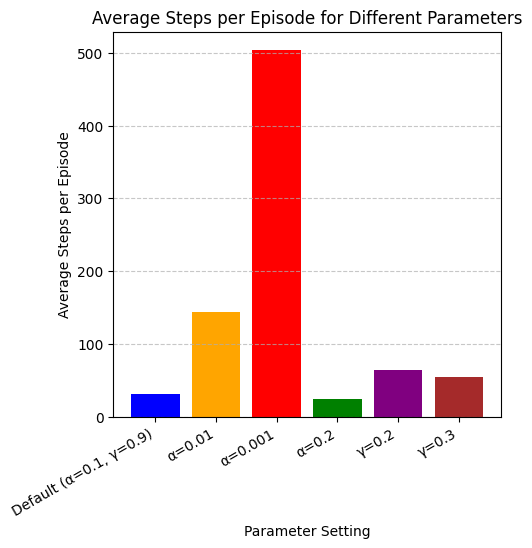

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data
parameters = ["Default (α=0.1, γ=0.9)", "α=0.01", "α=0.001", "α=0.2", "γ=0.2", "γ=0.3"]
avg_steps = [30.70, 143.65, 503.75, 23.76, 64.32, 54.77]

# Plot
plt.figure(figsize=(5, 5))
plt.bar(parameters, avg_steps, color=['blue', 'orange', 'red', 'green', 'purple', 'brown'])
plt.xlabel("Parameter Setting")
plt.ylabel("Average Steps per Episode")
plt.title("Average Steps per Episode for Different Parameters")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

##### Average Return per Episode

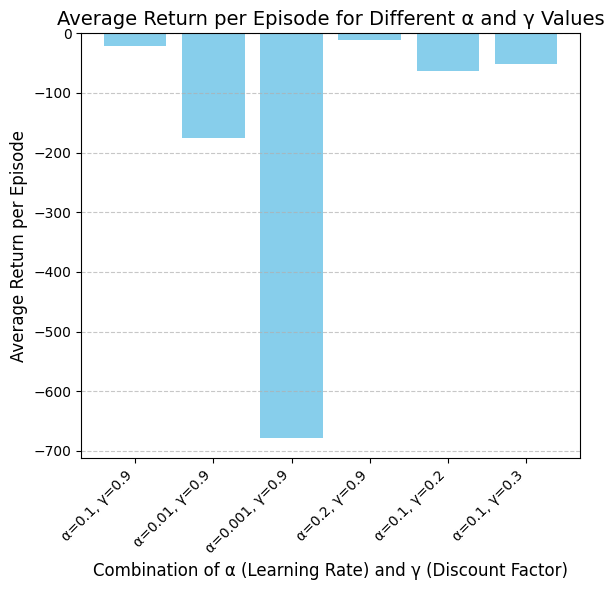

In [38]:
import matplotlib.pyplot as plt

# Data
learning_rates = [0.1, 0.01, 0.001, 0.2, 0.1, 0.1]
discount_factors = [0.9, 0.9, 0.9, 0.9, 0.2, 0.3]
avg_returns = [-21.31, -175.89, -678.81, -11.60, -63.46, -51.33]

# Labels for the x-axis
labels = [
    f"α={lr}, γ={df}" for lr, df in zip(learning_rates, discount_factors)
]

# Create the bar chart
plt.figure(figsize=(6, 6))
plt.bar(labels, avg_returns, color='skyblue')

# Add titles and labels
plt.title("Average Return per Episode for Different α and γ Values", fontsize=14)
plt.xlabel("Combination of α (Learning Rate) and γ (Discount Factor)", fontsize=12)
plt.ylabel("Average Return per Episode", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### Conclusion

- The **optimum parameters** are **α = 0.2** and **γ = 0.9** for the best balance of learning speed and reward maximization.
- A very low learning rate (0.01, 0.001) causes slow convergence and poor performance.
- Lower discount factors (0.2, 0.3) lead to suboptimal long-term decision-making.